In this notebook, I will go through the text and exercises of Hogg's pedagogical text, [*Fitting a Model to Data*](https://arxiv.org/abs/1008.4686) (2010). I think that the following are also interesting notes on the matter:

* [*Probabilistic Modelling and Inference in Astronomy*](https://speakerdeck.com/dfm/probabilistic-modeling-and-inference-in-astronomy), by Dan Foreman-Mackey (2015)
* [*An Astronomer's Guide to Gaussian Processes*](https://speakerdeck.com/dfm/an-astronomers-introduction-to-gaussian-processes-v2), by Dan Foreman-Mackey (2014)
* [*Gaussian Processes for Machine Learning*](http://www.gaussianprocess.org/gpml/), by Rasmussen and Williams (2006). (This is considered one the salient texts on the subject of Gaussian processes.)
* [*Statistical Techniques (Cosmic Dawn)*](http://cosmo.nyu.edu/hogg/research/2016/06/21/hogg_cosmicdawn_2016-06-21.pdf), by David Hogg (2016)

## Standard practice

Suppose that we have a set of $N > 2$ points, $(x_i, y_i)$ with uncertainties on $y_i$ described by a Gaussian distribution, $\sigma_{yi}$, and no uncertainties at all on $x_i$. Then in order to find a "best-fit" function of the form $$ f(x) = mx + b, $$ where $m$ is the slope and $b$ is the intercept, then we can follow the following standard practice.

First we will construct the following vector and matricies:
$$ \vec Y  = \begin{pmatrix}y_1 \\ y_2 \\ \cdots \\ y_N \end{pmatrix}, $$
$$ {\bf A} = \begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \cdots & \cdots \\ 1 & x_N \end{pmatrix}, $$
$$ {\bf C} = \begin{pmatrix} \sigma_{y1}^2 & 0 & \cdots & 0 \\
                             0 & \sigma_{y2}^2 & \cdots & 0 \\
                             \cdots & \cdots & \cdots & \cdots \\
                             0 & 0 & \cdots & \sigma_{yN}^2 \end{pmatrix}, $$

where we have written the simplified diagonal covariance matrix, $\bf C$ with non-correlated uncertainties. Then, the best-fit values for the parameters $m$ and $b$ are simply described by the column vector ${\vec X} = \begin{pmatrix} b \\ m \end{pmatrix}$, which is the solution to the overconstrained problem, $\vec Y = {\bf A} \vec X$, and computed via
$$ {\vec X} = [{\bf A^{\rm T} C^{-1} A}]^{-1} [{\bf A^{\rm T} C^{-1}} {\vec Y}]. $$

Why does this work? In fact, these steps minimize a function, $\chi^2$, which is the total squared, uncertainty-weighted error:
$$ \begin{align}\chi^2 &= [\vec Y - {\bf A} \vec X]^{\rm T} {\bf C}^{-1} [\vec Y - {\bf A} \vec X], \\ 
                       &= \sum_{i=1}^N \frac{[y_i -f(x_i)]^2}{\sigma_{yi}^2}.
   \end{align}$$
   
When uncertainties are Gaussian, and variances $\sigma_{yi}^2$ are estimated correctly, then the matrix $[{\bf A C^{-1} A}]^{-1}$ is the covariance matrix for $\vec X = (b, m)$. 

### Exercise 1
Fit data points 5 - 20 in Table 1.

In [1]:
import os
import numpy as np

data = np.genfromtxt(os.path.join(os.getcwd(), '..', 'data', 'table1.cat'), names=True)
x = data['x'][4:]
y = data['y'][4:]
sig_y = data['sigma_y'][4:]

C = np.diag(sig_y**2)
A = np.column_stack((np.ones_like(x), x))

# for convenience...
AtCinv = np.matmul(A.T, np.linalg.pinv(C))

cov_X = np.linalg.pinv(np.matmul(AtCinv, A))

X = np.matmul(cov_X, np.matmul(AtCinv, y))

In [2]:
b, m = X

cov_bb = cov_X[0, 0]
cov_mm = cov_X[1, 1]

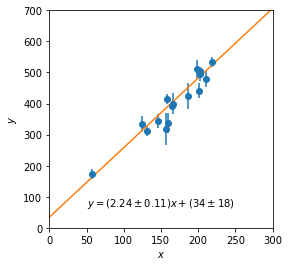

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# data points
ax.errorbar(x, y, yerr=sig_y, fmt='o', linestyle='none')

# solution
ax.text(0.5, 0.1, r'$y = ({:>3.2f} \pm {:>3.2f}) x + ({:>3.0f} \pm {:>3.0f})$'.format(m, np.sqrt(cov_mm),
                                                                                      b, np.sqrt(cov_bb)), 
        ha='center', transform=ax.transAxes)

# fit line
x_fit = np.linspace(0, 300, 10)
y_fit = m * x_fit + b

ax.plot(x_fit, y_fit)

ax.set_xlim(0, 300)
ax.set_ylim(0, 700)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

In [4]:
print(r'The standard uncertainty variance on the slope of the line is {:.4f}.'.format(cov_mm))

The standard uncertainty variance on the slope of the line is 0.0116.


### Exercise 2

Repeat Exercise 1 but for all of the points in the table.

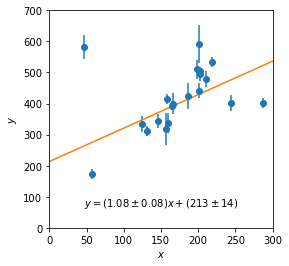

The standard uncertainty variance on the slope of the line is 0.0060.


In [5]:
# load data set
x = data['x']
y = data['y']
sig_y = data['sigma_y']

C = np.diag(sig_y**2)
A = np.column_stack((np.ones_like(x), x))

# calculate
AtCinv = np.matmul(A.T, np.linalg.pinv(C))
cov_X = np.linalg.pinv(np.matmul(AtCinv, A))
X = np.matmul(cov_X, np.matmul(AtCinv, y))

b, m = X
cov_bb = cov_X[0, 0]
cov_mm = cov_X[1, 1]

# plot
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.errorbar(x, y, yerr=sig_y, fmt='o', linestyle='none')
ax.text(0.5, 0.1, r'$y = ({:>3.2f} \pm {:>3.2f}) x + ({:>3.0f} \pm {:>3.0f})$'.format(m, np.sqrt(cov_mm),
                                                                                      b, np.sqrt(cov_bb)), 
        ha='center', transform=ax.transAxes)

x_fit = np.linspace(0, 300, 10)
y_fit = m * x_fit + b
ax.plot(x_fit, y_fit)

ax.set_xlim(0, 300)
ax.set_ylim(0, 700)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

print(r'The standard uncertainty variance on the slope of the line is {:.4f}.'.format(cov_mm))

Yeah, this is kind of lame. The new points seem to be major outliers, and yet the variance on the slope has *decreased*.

### Exercise 3

Repeat exercise 1, but use a quadratic model: $g(x) = q x^2 + mx + b$.

The standard uncertainty variance on the slope of the line is 0.3361.


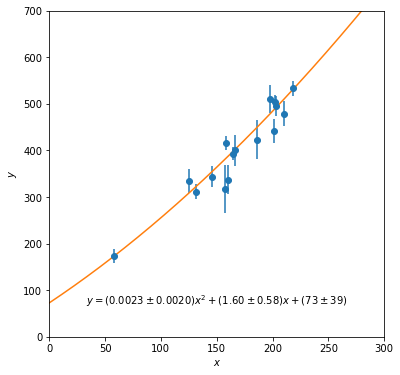

In [6]:
x = data['x'][4:]
y = data['y'][4:]
sig_y = data['sigma_y'][4:]

C = np.diag(sig_y**2)
A = np.column_stack((np.ones_like(x), x, x**2)) # added quadratic term

AtCinv = np.matmul(A.T, np.linalg.pinv(C))

cov_X = np.linalg.pinv(np.matmul(AtCinv, A))
cov_bb = cov_X[0, 0]
cov_mm = cov_X[1, 1]
cov_qq = cov_X[2, 2]

X = np.matmul(cov_X, np.matmul(AtCinv, y))
b, m, q = X

# plot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.errorbar(x, y, yerr=sig_y, fmt='o', linestyle='none')
ax.text(0.5, 0.1, 
        r'$y = ({:.4f} \pm {:.4f})x^2 + ({:.2f} \pm {:.2f}) x + ({:.0f} \pm {:.0f})$'.format(q, np.sqrt(cov_qq),
                                                                                             m, np.sqrt(cov_mm),
                                                                                             b, np.sqrt(cov_bb)), 
        ha='center', transform=ax.transAxes)

x_fit = np.linspace(0, 300, 1000)
y_fit = q * x_fit**2 + m * x_fit + b
ax.plot(x_fit, y_fit)

ax.set_xlim(0, 300)
ax.set_ylim(0, 700)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

print(r'The standard uncertainty variance on the slope of the line is {:.4f}.'.format(cov_mm))

## The objective function

So in the previous section, we've implicitly used a function to judge the quality of the fit -- an **objective function**. However, this choice of objective function should be justified prior to determining the best fit; otherwise, there is no basis for evaluating which models are really *good* or the *best*.

We seek to make a **generative model** for the data, i.e., a parameterized model that could have generated our data set. An example is a linear funciton $y = mx + b$, by which we expect the true $y$ values to be determined by $m, x,$ and $b$, and that the only deviations from this form are described by small offsets in $y$ drawn from a Gaussian distribution with zero mean and known variance $\sigma_y^2$.

The distribution of data points $y_i$, given $x_i$, $\sigma_{yi}$, $m$, and $b$, is then
$$ p\big(y_i \big | \{x_i, \sigma{yi}, m, b\}\big) = \frac{1}{\sqrt{2\pi \sigma_{yi}^2 }} \exp \left ( - \frac{[y_i - (m x_i + b)]^2}{2 \sigma_{yi}^2}\right ). $$

With this generative model, we seek the model (with parameters $m$ and $b$) that maximizes the *likelihood of the parameters*. Because the data points are independently drawn (or at least, currently implied so), the likelihood $\mathcal L$ is then the product of conditional probabilities:

$$ \mathcal L = \prod_{i=1}^N p \big(y_i \big |  \{x_i, \sigma{yi}, m, b\} \big). $$

So then the logarithm of $\mathcal L$ (a proxy for $\mathcal L$, since the $\log$ is monotonic) is
$$ \begin{align}\ln \mathcal L &= K - \sum_{i=1}^N \left ( - \frac{[y_i - (m x_i + b)]^2}{2 \sigma_{yi}^2}\right ), \\ 
                               &= K - \frac{1}{2} \chi^2,
   \end{align}$$
   
where $K$ is just some constant. For this reason, maximizing the likelihood *is identical to minmizing $\chi^2$*, and now, we have justified the procedure done in the previous section.

The location of this convex solution is easily found by taking a derivative.

### Exercise 4

Imagine a set of $N$ measurements, $t_i$, with uncertainty variances $\sigma_{ti}^2$, all of the same (unknown) quantity $T$. Now assuming the generative model that each $t_i$ deviates from $T$ according to a Gaussian-distributed offset with zero mean and variance $\sigma_{ti}^2$, what is the log likelihood $\ln \mathcal L$ for the data? Take a derivative and show that the maximum likelihood value for $T$ is the usual weighted mean.

In this case, we are assuming that the data points $t_i$ given some unknown $T$ is distributed with some probability
$$ p \left(t_i \big | T \right ) \propto \exp \left ( -\frac{\left (t_i - T \right )^2}{2 \sigma_{ti}^2}\right ).$$

Then $\ln \mathcal L = K - \sum_{i=1}^N \left [ (t_i - T)^2 / 2\sigma_{ti}^2\right ]$, and so the maximum likelihood of $T$ is located where $d\ln \mathcal L / d T = 0$, or
$$ \sum_{i=1}^N \frac{t_i - T}{\sigma_{ti}^2} = 0,$$
$$\begin{align}&\Longrightarrow T \sum_{i=1}^N \frac{1}{\sigma_{ti}^2} = \sum_{i=1}^N \frac{t_i}{N}, \\
&\Longrightarrow T = \frac{ \sum_{i=1}^N t_i /\sigma_{ti}^2}{ \sum_{i=1}^N 1 / \sigma_{ti}^2}
\end{align}$$

This is exactly the weighted mean with weights $1/\sigma_{ti}^2$.

### Exercise 5
Using the matrix formulation for $\chi^2 = [\vec Y - {\bf A} \vec X]^{\rm T} {\bf C}^{-1} [\vec Y - {\bf A} \vec X]$, take derivatives to show that the mimum is at the matrix location given by $\vec X = [{\bf A^{\rm T} C^{-1} A}]^{-1} [{\bf A^{\rm T} C^{-1}} {\vec Y}]$.

(Note, by the way, that in the data space, the covariance matrix acts like a metric. It turns $N$-d vector displacements from data to model, $\vec Y - {\bf A} \vec X$, into a distance, $\chi^2$.)

Let's suppose that our model is parameterized by variables $x^{(1)}, x^{(2)}, \ldots, x^{(M)}$ so that $\vec X = (x^{(1)}, x^{(2)}, \ldots, x^{(M)})^{\rm T}$ is a column vector of length $M$, and $\bf A$ is a $N \times M$ matrix. We then want to take a derivative of $\chi^2$ with respect to the variables in the column vector $\vec X$.

(By the way, I'm assuming that $\vec Y$, $\bf A$, and $\bf C^{-1}$ are independent of $\vec X$. $\bf A^{\rm T} C^{-1}A $ should also be a symmetric matix.)

First, we expand the terms in $\chi^2$ and group them selectively:
$$ \chi^2 = \vec Y^{\rm T} {\bf C^{-1}} \vec Y - \left (\vec Y^{\rm T}{\bf C^{-1} A}\right ) \vec X - \vec X^{\rm T} \left ({\bf A^{\rm T} C^{-1}} \vec Y\right ) + \vec X^{\rm T} \left ({\bf A^{\rm T} C^{-1} A}\right ) \vec X. $$

Then, making use of a few identities (in which we have $\bf B$ not a function of $\vec X$ and $\bf S$ symmetric),
$$ \frac{d \vec X^{\rm T} {\bf B}}{d\vec X} = {\bf B}^{\rm T}, \ \ \ \ \  \frac{d}{d \vec X} \left (\vec X^{\rm T} {\bf S} \vec X \right) = 2 \vec X^{\rm T} {\bf S},$$
we can take the derivative
$$\begin{align}
\frac{d\chi^2}{d\vec X} &= 0 - \left (\vec Y^{\rm T} {\bf C^{-1} A}\right ) - \left ({\bf A^{\rm T} C^{-1}} \vec Y \right)^{\rm T} + 2 \vec X^{\rm T} \left ({\bf A^{\rm T} C^{-1} A} \right), \\
& = - 2 \left ({\bf A^{\rm T} C^{-1}} \vec Y \right)^{\rm T} + 2 \vec X^{\rm T} \left ({\bf A^{\rm T} C^{-1} A} \right), \\
&\textrm{and set it equal to zero to find the location of the extremum:} \\
0 &= - \left ({\bf A^{\rm T} C^{-1}} \vec Y \right) + \left ({\bf A^{\rm T} C^{-1} A} \right) \vec X, \\
\vec X &= \left ({\bf A^{\rm T} C^{-1} A} \right)^{-1} \left ({\bf A^{\rm T} C^{-1}} \vec Y \right).
\end{align} $$

## Outliers

Sometimes it's necessary to deal with outlier data points that don't appear to be consistent with our model. This can be done by one of three ways: (1) pruning the data by hand, (2) objectively reject or remove sensitivity to the "bad" points, or (3) model the data-point uncertainties in a better way. The first method violates our philosphy of creating a generative model *before* evaluating the goodness of fit. The second and third methods are objective and reproducible (and are the same in essence).

We can construct a likelihood from an expanded model with *foreground*, or "good" data points, as well as *background*, or "bad" data points. We will add to the model a set of $N$ integers $\{q_1, q_2, \ldots, q_N \}$, which are either 1 or 0 depending on whether the points are good or bad. Furthermore, we will quantify the **prior** probability that any data point is bad, $P_b$, and parameters $(Y_b, V_b)$, the mean and variance that describe the Gaussian-distributed bad points (as of now, *only in the $y$-direction*).

Then, the likelihood is
$$ \mathcal L = \prod_{i=1}^N \left [ \frac{1}{\sqrt{2 \pi \sigma_{yi}^2}} \exp \left (-\frac{\left [y_i - (mx_i + b)\right ]^2}{2 \sigma_{yi}^2}\right ) \right]^{\ q_i}\times \left [ \frac{1}{\sqrt{2 \pi \left ( V_b + \sigma_{yi}^2\right )}} \exp \left (-\frac{\left [y_i - Y_b\right ]^2}{2 \left( V_b + \sigma_{yi}\right )^2}\right ) \right]^{\  1-q_i}.$$

But how do we incorporate priors? In general, the **posterior** probability distribution is the (normalized) likelihood times the prior. Given data $\vec y = \{y_1, y_2, \ldots, y_N\}$, and model parameters $\vec \theta = \{m, b, q_1, \ldots, q_N, P_b, Y_b, V_b\}$, and prior $I$, the posterior is
$$ p(\theta, I) = \frac{p(\vec y | \vec \theta, I)}{p(\vec y | I)} p(\vec \theta | I).$$

Our interest is in the straight-line model parameters, $m, b$, and not in the "bad data" model parameters, and so we will **marginalize** them out by integrating (or summing) over all of their possible configurations:
$$ p\left (m, b | \vec y, I\right ) = \int d^N \vec q\,dP_b\,dY_b\,dV_b\ p(\vec \theta, I),$$
resulting in a **Gaussian mixture model**. This model is effectively a mixture of two Gaussian distributions with different amplitudes, one of which is a straight-line model, and the other an outlier model. We can then sum over the $2^N$ cases of $q_i$. In this case, the likelihood is proportional to

$$ \mathcal L \propto \prod_{i=1}^N \left [ \frac{1 - P_b}{\sqrt{2 \pi \sigma_{yi}^2}} \exp \left (-\frac{\left [y_i - (mx_i + b)\right ]^2}{2 \sigma_{yi}^2}\right ) +   \frac{P_b}{\sqrt{2 \pi \left ( V_b + \sigma_{yi}^2\right )}} \exp \left (-\frac{\left [y_i - Y_b\right ]^2}{2 \left( V_b + \sigma_{yi}^2\right )}\right ) \right].$$

To actually accomplish this task, however, requires strategy and computational power. Both marginalization and sampling the distribution can be done by using a **Monte-Carlo Markov Chain**, or MCMC.

### Exercise 6

Using the mixture model proposed above, find the best-fit, maximum *a posteriori* (MAP) straight line for the data in Table 1 using only the $x, y, \sigma_y$ columns. Marginalize over the nuisance parameters and show the 2-$d$ histogram of $(m, b)$ samples. Show also the MAP line (as well as 10 lines drawn from the marginalized posterior distribution for $m, b$) on a scatter plot of the data.

In [40]:
# reload the data
data = np.genfromtxt(os.path.join(os.getcwd(), '..', 'data', 'table1.cat'), names=True)
x = data['x']
y = data['y']
sig_y = data['sigma_y']

C = np.diag(sig_y**2)
A = np.column_stack((np.ones_like(x), x))

AtCinv = np.matmul(A.T, np.linalg.pinv(C))
cov = np.linalg.pinv(np.matmul(AtCinv, A))

b_init, m_init = np.matmul(cov, np.matmul(AtCinv, y))

In [41]:
# ln likelihood is simply the log of the mixture model
def lnlike(theta, x, y, sig_y):
    b, m, P_b, Y_b, V_b = theta
    model = m * x + b

    straight_line = (1.-P_b)/(sig_y*np.sqrt(2*np.pi)) * np.exp(-0.5*(y-model)**2/sig_y**2)
    nuisance = P_b/np.sqrt(2*np.pi*(V_b+sig_y**2)) * np.exp(-0.5*(y-Y_b)**2/(V_b+sig_y**2))
    
    return np.sum(np.log(straight_line + nuisance))

# now construct uniform priors on m, b, P_b, Y_b, and V_b across a large range
def lnprior(theta):
    b, m, P_b, Y_b, V_b = theta
    if (-50 < b < 250) & (0 < m < 4) & \
       (0. < P_b < 1.) & (-1e4 < Y_b < 1e4) & (0. < V_b < 1e8):
        return 0.0
    return -np.inf

# finally, combine to get ln probability
def lnprob(theta, x, y, sig_y):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, sig_y)

In [42]:
# use scipy optimization to minimize chi^2
from scipy.optimize import minimize

chi2 = lambda *args : -lnprob(*args)

result_MAP = minimize(chi2, [b_init, m_init, 0.5, 0., 500.], args=(x, y, sig_y))
p_MAP = result_MAP['x']

In [10]:
# now use emcee to sample the space, marginalizing over latter params
import emcee

nwalkers = 200
ndim = 5
nsteps = 1000

# initialize walker positions
init_pos = [p_MAP + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, sig_y))
sampler.run_mcmc(init_pos, nsteps, rstate0=256);

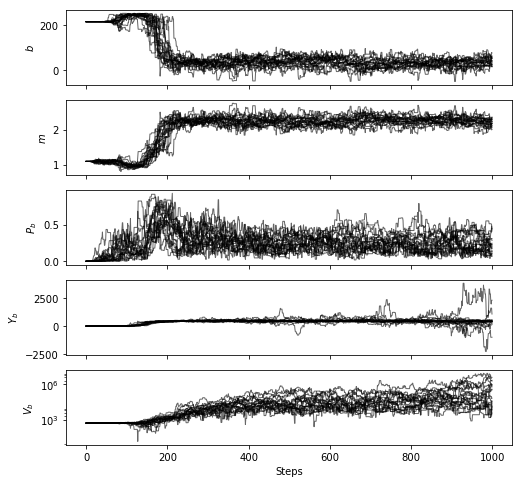

In [11]:
# and visualize the MC markov chain
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(8, 8))
for i, [ax, param] in enumerate(zip(axes, ['$b$', '$m$', '$P_b$', '$Y_b$', '$V_b$'])):
    walkers = sampler.chain[:, :, i]
    for walker in walkers[::10]:
        ax.plot(xrange(nsteps), walker, lw=1.0, color='k', alpha=0.6)
    ax.set_ylabel(param)

axes[4].set_yscale('log')
axes[4].set_xlabel('Steps');

We can see some nice burn-in after about 250 steps. Let's use the rest of the steps as our sampled data to fidn the posterior probability distribution.

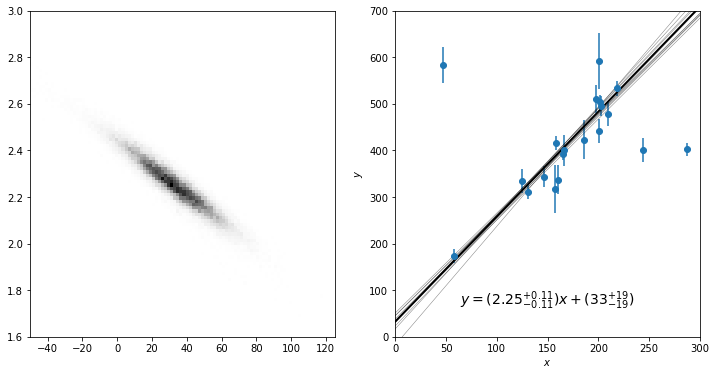

In [12]:
samples = sampler.chain[:, 250:, :].reshape((-1, ndim))

fig, [ax, ax2] = plt.subplots(1, 2, figsize=(12, 6))

# show marginalized posterior
ax.autoscale(False)

# make 2d histogram
counts, ybins, xbins, im = ax.hist2d(samples[:, 0], samples[:, 1], bins=100, 
                                     range=[[-50, 125], [1.6, 3.0]], cmap='Greys')

ax.set_xlim(-50, 125)
ax.set_ylim(1.6, 3.0)

# show fit
ax2.errorbar(x, y, yerr=sig_y, fmt='o', linestyle='none')

# MAP (best-fit) line
b, b_16, b_84 = np.percentile(samples[:, 0], [50, 16, 84], axis=0)
m, m_16, m_84 = np.percentile(samples[:, 1], [50, 16, 84], axis=0)

x_fit = np.linspace(0, 300, 10)
y_fit = m * x_fit + b

ax2.plot(x_fit, y_fit, color='black', lw=2.0)
ax2.text(0.5, 0.1, r'$y=({:>3.2f}_{{-{:3.2f}}}^{{+{:3.2f}}})x+({:3.0f}_{{-{:3.0f}}}^{{+{:3.0f}}})$'.format(m, m-m_16, m_84-m,
                                                                                                           b, b-b_16, b_84-b), 
        ha='center', fontsize=14, transform=ax2.transAxes)

# plot some random values
for (b, m) in samples[np.random.randint(len(samples), size=10), 0:2]:
    ax2.plot(x_fit, m * x_fit + b, color='black', lw=0.5, alpha=0.5)

ax2.set_xlim(0, 300)
ax2.set_ylim(0, 700)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')

### Exercise 7

Show the marginalized $P_b$ posterior. Repeat again, after having divided all of the $\sigma_{yi}$ by 2.

In [13]:
# divide sigma_y by 2.
new_sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, sig_y / 2.))

init_pos = [p_MAP + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
new_sampler.run_mcmc(init_pos, nsteps, rstate0=256);

new_samples = new_sampler.chain[:, 250:, :].reshape((-1, ndim))

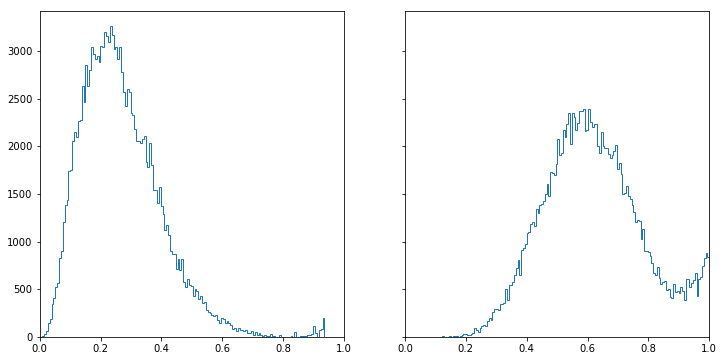

In [14]:
fig, [ax, ax2] = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# plot original
p_b_posterior = samples[:, 2]
ax.hist(p_b_posterior, bins=150, histtype='step');
ax.set_xlim(0, 1.0)

# plot incorrectly estimate uncertainties.
new_p_b_posterior = new_samples[:, 2]
ax2.hist(new_p_b_posterior, bins=150, histtype='step');
ax2.set_xlim(0, 1.0);

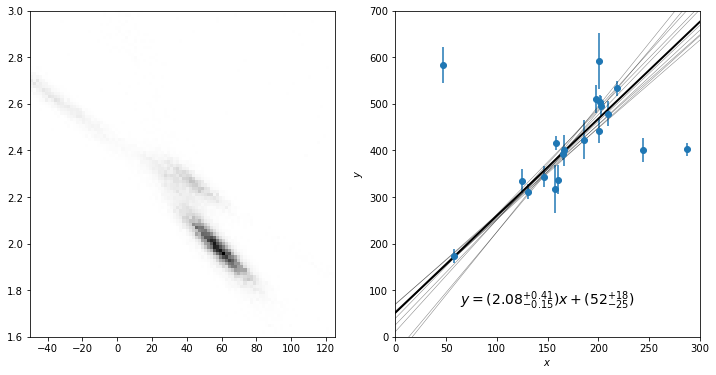

In [15]:
fig, [ax, ax2] = plt.subplots(1, 2, figsize=(12, 6))

# show marginalized posterior
ax.autoscale(False)

# make 2d histogram
counts, ybins, xbins, im = ax.hist2d(new_samples[:, 0], new_samples[:, 1], bins=100, 
                                     range=[[-50, 125], [1.6, 3.0]], cmap='Greys')

ax.set_xlim(-50, 125)
ax.set_ylim(1.6, 3.0)

# show fit
ax2.errorbar(x, y, yerr=sig_y, fmt='o', linestyle='none')

# MAP (best-fit) line
b, b_16, b_84 = np.percentile(new_samples[:, 0], [50, 16, 84], axis=0)
m, m_16, m_84 = np.percentile(new_samples[:, 1], [50, 16, 84], axis=0)

x_fit = np.linspace(0, 300, 10)
y_fit = m * x_fit + b

ax2.plot(x_fit, y_fit, color='black', lw=2.0)
ax2.text(0.5, 0.1, r'$y=({:>3.2f}_{{-{:3.2f}}}^{{+{:3.2f}}})x+({:3.0f}_{{-{:3.0f}}}^{{+{:3.0f}}})$'.format(m, m-m_16, m_84-m,
                                                                                                           b, b-b_16, b_84-b), 
        ha='center', fontsize=14, transform=ax2.transAxes)

# plot some random values
for (b, m) in new_samples[np.random.randint(len(new_samples), size=10), 0:2]:
    ax2.plot(x_fit, m * x_fit + b, color='black', lw=0.5, alpha=0.5)

ax2.set_xlim(0, 300)
ax2.set_ylim(0, 700)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')

Clearly bad things happen if we don't estimate our uncertainties correctly.

## Uncertainties in best-fit parameters

Our covariance matrix provides the best-fit uncertainties in the parameters $b, m$:
$$ \left [ {\bf A^{\rm T} C^{-1} A}\right]^{-1} = 
\begin{pmatrix} 
\sigma_b^2 & \sigma_{mb} \\
\sigma_{mb} & \sigma_m^2 
\end{pmatrix},$$
but these are only accurate when the following conditions are met:
1. The uncertaintes on data points $\sigma_{yi}$ are correctly estimated.
2. No data are rejected or depart from the $\chi^2$ defined above.
3. The generative model of a straight-line model with additional noise characterized by a Gaussian process is accurate. 

If they are violated, and we don't approach a good fit, the covariance matrix can return nonsensical uncertainties. And in the real world, the conditions are rarely met, so instead, we should formulate a strategy for estimating uncertainties empirically.

One strategy following the Bayesian approach is to compute the second moments of the posterior distribution function. Another strategy commonly employed, but deviating from the Bayesian philosophy, is to use *bootstrap* or *jackknife* resampling methods. Bootstrapping creates new data sets similar to your original one, and jackknifing measures the differential sensitivity to individual data points. 

So if you run $T$ bootstrap trials, then your uncertainty estimate on the slope, for example, is 
$$ \sigma_m^2 = \frac{1}{T} \sum_{j=1}^T \left ( m_j - m \right )\left ( m_j - m \right ),$$
where $m$ is the best-fit slope for all the data, and $m_j$ is the best-fit slope for some bootstrap trial $j$. Covariances can be calculated similarly, e.g., $ \sigma_{bm} = \frac{1}{T} \sum_{j=1}^T \left ( b_j - b \right )\left ( m_j - m \right )$.

For jackknifing, we now define $m$ to be the mean of all $j=\{1,\ldots,T\}$ jackknife trials ($ m = \frac{1}{T}\sum_{j=1}^T m_j$),
and the covariance is 
$$ \sigma_{bm} = \frac{T-1}{T}\sum_{j=1}^T \left(b_j - b \right) \left(m_j - m\right ).$$

Both of these methods can be very useful when we don't trust our estimated uncertainties on the data, $\sigma_{yi}$. They do also introduce new assumptions, however, such as the necessity that bootstrap- or jackknife-generated samples must represent *possible data* from a set of similar, hypothetical experiments. If our model does not fit the data well, then the reiterations would not represent a good resampling of the data, and the estimated variances would be incorrect -- this may be the case when our uncertainty estimates are wrong.

### Exercise 8

Repeat Exercise 2 and compare $\sigma_m^2$ from the covariance matrix with $\sigma_m^2$ estimated from jackknifing with 20 trials.

In [16]:
data = np.genfromtxt(os.path.join(os.getcwd(), '..', 'data', 'table1.cat'), names=True)

x = data['x']
y = data['y']
sig_y = data['sigma_y']

# exercise 2
C = np.diag(sig_y**2)
A = np.column_stack((np.ones_like(x), x))

AtCinv = np.matmul(A.T, np.linalg.pinv(C))
cov_X = np.linalg.pinv(np.matmul(AtCinv, A))

cov_mm = cov_X[1, 1]
print('The variance estimate on the slope is {:.4f} as calculated by the covariance matrix.'.format(cov_mm))

# now do a jackknife
def jackknife(data):
    
    x = data['x']
    y = data['y']
    ones = np.ones_like(x)
    sig_y = data['sigma_y']
    
    
    def generate_trials(data):
        for i in xrange(len(data)):
            mask = np.array([True] * len(data), dtype=bool)
            mask[i] = False

            A = np.column_stack((ones[mask], x[mask]))
            C = np.diag(sig_y[mask]**2)
            
            AtCinv = np.matmul(A.T, np.linalg.pinv(C))
            cov_X = np.linalg.pinv(np.matmul(AtCinv, A))
            
            X = np.matmul(cov_X, np.matmul(AtCinv, y[mask]))

            yield X[1]
    
    m_trials = list(generate_trials(data))
    
    m = np.mean(m_trials)
    cov_mm = (len(data) - 1.) / len(data) * np.sum(np.power([m_j - m for m_j in m_trials], 2))
    
    return cov_mm

print('The variance estimate on the slope is {:.4f} as calculated by jackknife.'.format(jackknife(data)))

The variance estimate on the slope is 0.0060 as calculated by the covariance matrix.
The variance estimate on the slope is 0.7639 as calculated by jackknife.


In exercise 8, it does look like the jackknife variance estimate greatly differs from the covariance matrix, and this is likely due to the problematic first four data points (for which $\sigma_{y}$ are not properly estimated)!

In [17]:
# what if I repeat but only for the good points? (e.g., only keep rows 5-20)
data = np.genfromtxt(os.path.join(os.getcwd(), '..', 'data', 'table1.cat'), names=True)
data = data[5:]

x = data['x']
y = data['y']
sig_y = data['sigma_y']

# exercise 2
C = np.diag(sig_y**2)
A = np.column_stack((np.ones_like(x), x))

AtCinv = np.matmul(A.T, np.linalg.pinv(C))
cov_X = np.linalg.pinv(np.matmul(AtCinv, A))

cov_mm = cov_X[1, 1]
print('The variance estimate on the slope is {:.4f} as calculated by the covariance matrix.'.format(cov_mm))

# now do a jackknife
def jackknife(data):
    
    x = data['x']
    y = data['y']
    ones = np.ones_like(x)
    sig_y = data['sigma_y']
    
    def generate_trials(data):
        for i in xrange(len(data)):
            mask = np.array([True] * len(data), dtype=bool)
            mask[i] = False

            A = np.column_stack((ones[mask], x[mask]))
            C = np.diag(sig_y[mask]**2)
            
            AtCinv = np.matmul(A.T, np.linalg.pinv(C))
            cov_X = np.linalg.pinv(np.matmul(AtCinv, A))
            
            X = np.matmul(cov_X, np.matmul(AtCinv, y[mask]))
            yield X[1]
    
    m_trials = list(generate_trials(data))
    m = np.mean(m_trials)
        
    cov_mm = (len(data) - 1.) / len(data) * np.sum(np.power([m_j - m for m_j in m_trials], 2))
    
    return cov_mm

print('The variance estimate on the slope is {:.4f} as calculated by jackknife.'.format(jackknife(data)))

The variance estimate on the slope is 0.0122 as calculated by the covariance matrix.
The variance estimate on the slope is 0.0295 as calculated by jackknife.


Okay, these are now more into agreement (but still not fully). My guess is that the model needs an "outlier" Gaussian component, which introduces a lot more variance.

### Exercise 9

Redo Exercise 6 (implementing the mixture-based model) but only with data points 5 - 20. Repeat with uncertainties $\sigma_{yi}$ reduced by a factor of 2.

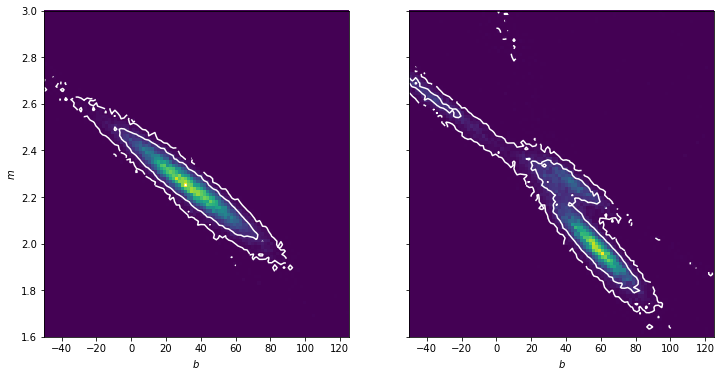

In [53]:
# no need to redo the MCMC, so I'll just take samples and new_samples, which are the resulting chains

import matplotlib.colors as colors

fig, [ax, ax2] = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# make 2d histogram
counts, _, _, _ = ax.hist2d(samples[:, 0], samples[:, 1], bins=100, 
                            range=[[-50, 125], [1.6, 3.0]], cmap='viridis')
ax.contour(counts.T, 5, extent=[-50, 125, 1.6, 3.0], colors='white', norm=colors.LogNorm(vmin=10., vmax=1e6))
ax.set_xlabel('$b$')
ax.set_ylabel('$m$')

new_counts, _, _, _ = ax2.hist2d(new_samples[:, 0], new_samples[:, 1], bins=100, 
                                 range=[[-50, 125], [1.6, 3.0]], cmap='viridis')
ax2.contour(new_counts.T, 5, extent=[-50, 125, 1.6, 3.0], colors='white', norm=colors.LogNorm(vmin=10., vmax=1e6));
ax2.set_xlabel('$b$')


## Correlated measurements

It's possible that our measured uncertainties (or estimates) are wrong, which will change $\chi^2$ values for any given model. It's also very possible that our uncertainties are *correlated*, which would invalidate $\chi^2$ as well. Off-diagonal elements on the covariance matrix, $\bf C$, must then be computed:
$$
\begin{align}
\chi^2 &= \left (\vec Y - {\bf A} \vec X \right )^{\rm T} {\bf C}^{-1} \left( \vec Y - {\bf A} \vec X\right ), \\
&= \sum_{i=1}^N \sum_{j=1}^N w_{ij} \big [ y_i - f(x_i) \big]\big [ y_j - f(x_j)\big],
\end{align}
$$
where $w_{ij}$ are the elements of the inverse covariance matrix $\bf C^{-1}$.

### Exercise 10

Compute and asses the $\chi^2$ values for the fits performed in Exercises 1 and 2.

In [48]:
# chi^2 for exercise 1
data = np.genfromtxt(os.path.join(os.getcwd(), '..', 'data', 'table1.cat'), names=True)
x = data['x'][4:]
y = data['y'][4:]
sig_y = data['sigma_y'][4:]

C = np.diag(sig_y**2)
A = np.column_stack((np.ones_like(x), x))

AtCinv = np.matmul(A.T, np.linalg.pinv(C))
cov_X = np.linalg.pinv(np.matmul(AtCinv, A))
X = np.matmul(cov_X, np.matmul(AtCinv, y))

L = (y - np.matmul(A, X))
chi2 = np.matmul(np.matmul(L.T, np.linalg.pinv(C)), L)
print('The chi-squared in Exercise 1 is {:.1f}'.format(chi2))

chi2_okay_range = (len(x) - 2) + np.array([-1, 1]) * np.sqrt(2 * len(x) - 2)
print('Chi-squared values in the ballpark of {:.1f} to {:.1f} suggest that our model is good.'.format(*chi2_okay_range))

The chi-squared in Exercise 1 is 18.7
Chi-squared values in the ballpark of 8.5 to 19.5 suggest that our model is good.


If we use the criterion $\chi^2 \sim (N-2) \pm \sqrt{2(N-2)}$ to determine the goodness of fit for our 2-parameter model for $N=16$ data points, then we see that $\chi^2$ is indeed in this range.

In [49]:
# chi^2 for exercise 2
data = np.genfromtxt(os.path.join(os.getcwd(), '..', 'data', 'table1.cat'), names=True)
x = data['x']
y = data['y']
sig_y = data['sigma_y']

C = np.diag(sig_y**2)
A = np.column_stack((np.ones_like(x), x))

AtCinv = np.matmul(A.T, np.linalg.pinv(C))
cov_X = np.linalg.pinv(np.matmul(AtCinv, A))
X = np.matmul(cov_X, np.matmul(AtCinv, y))

L = (y - np.matmul(A, X))

chi2 = np.matmul(np.matmul(L.T, np.linalg.pinv(C)), L)
print('The chi-squared in Exercise 1 is {:.1f}'.format(chi2))

chi2_okay_range = (len(x) - 2) + np.array([-1, 1]) * np.sqrt(2 * len(x) - 2)
print('Chi-squared values in the ballpark of {:.1f} to {:.1f} suggest that our model is good.'.format(*chi2_okay_range))

The chi-squared in Exercise 1 is 290.0
Chi-squared values in the ballpark of 11.8 to 24.2 suggest that our model is good.


So for the data with outliers, it looks like our model does not perform well.

### Exercise 11
Throw out the $\sigma_{yi}^2$ estimates and instead assume that the variances are the same value, $S$. What uncertainty variance $S$ would make $\chi^2 = N-2$? And how does it compare to the mean or median of the actual uncertainty variances $\sigma_{yi}^2$?

The actual mean and median variances are 739.1 and 554.5, respectively.


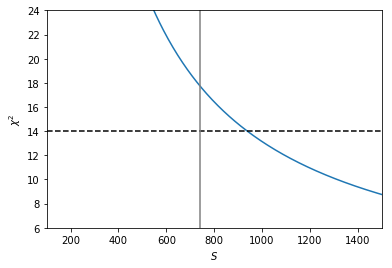

In [65]:
data = np.genfromtxt(os.path.join(os.getcwd(), '..', 'data', 'table1.cat'), names=True)
x = data['x'][4:]
y = data['y'][4:]
sig_y = data['sigma_y'][4:]

print('The actual mean and median variances are {:.1f} and {:.1f}, respectively.'.format(np.mean(sig_y**2),
                                                                                         np.median(sig_y**2)))
A = np.column_stack((np.ones_like(x), x))

chi2 = np.empty(500,)
S_list = np.linspace(10., 2000., len(chi2))
for n, S in enumerate(S_list):
    C = np.diag(S * np.ones_like(y))
    AtCinv = np.matmul(A.T, np.linalg.pinv(C))
    cov_X = np.linalg.pinv(np.matmul(AtCinv, A))
    X = np.matmul(cov_X, np.matmul(AtCinv, y))

    L = (y - np.matmul(A, X))

    chi2[n] = np.matmul(np.matmul(L.T, np.linalg.pinv(C)), L)
    
plt.plot(S_list, chi2)
plt.axhline(len(x) - 2, color='black', ls='--')
plt.axvline(np.mean(sig_y**2), color='grey')

plt.xlim(100, 1500)
plt.xlabel('$S$')
plt.ylim(6, 24)
plt.ylabel(r'$\chi^2$');

In [68]:
dist = lambda x, x0: np.abs(x - x0)
S_closest = S_list[np.argmin(dist(chi2, len(x) - 2))]

print('A variance of S = {:.0f} brings chi-squared closest to N - 2.'.format(S_closest))

A variance of S = 939 brings chi-squared closest to N - 2.


### Exercise 12

**I'm skipping this for now.**

## Arbitrary two-dimensional uncertainties

Suppose that we have uncertainties in both the $x$ and $y$ directions, $(\sigma_{xi}, \sigma_{yi})$. Then a convariance tensor $\mathbf S_i$ can be constructed:

$$ \mathbf S_i \equiv 
\begin{pmatrix} 
\sigma_{xi}^2 & \rho_{xyi}\sigma_{xi}\sigma_{yi} \\
\rho_{xyi}\sigma_{xi}\sigma_{yi} & \sigma_{yi}^2
\end{pmatrix}.
$$ 

Then for data points $\vec Z_i = (x_i, y_i)$, the "true values" which we would like to model are $\vec Z=(x, y)$, and we can represent the two-dimensional probability of measuring some data:

$$ p\left( x_i, y_i \vert \mathbf S_i, x, y \right) = \frac{1}{2\pi\sqrt{\det \mathbf S_i}} \exp \left (- \frac{1}{2} \left[\vec Z_i - \vec Z\right]^{\rm T} \mathbf{S_i}^{-1} \left[\vec Z_i - \vec Z\right] \right).$$

In order to choose the most likely straight-line fit, we must consider the geometry of our data and model. The straight-line model, with parameters $m, b$ is effectively a two-dimensional Gaussian with infinite eigenvalue along the line, and with zero eigenvalue orthogonal to the line. The measurements are then some projected distance away from the line in the orthogonal direction. This orthogonal direction, parameterized by the unit vector $\hat v$, is simply dependent on the slope, $m$:
$$ \hat v = \frac{1}{\sqrt{1 + m^2}} \begin{pmatrix}-m\\1\end{pmatrix} = \begin{pmatrix}-\sin\theta\\ \cos\theta \end{pmatrix},$$
where the angle $\theta = \tan^{-1} m$. Each data point's orthogonal displacement from the line (and onto $\hat v$), which we label $\Delta_i$, is then 
$$ \Delta_i = \hat v^{\rm T}\vec Z_i - b\cos \theta.$$
The orthogonal variance is equivalently the covariance tensor projected onto $\hat v$:
$$ \Sigma_i^2 = \hat v^{\rm T} \mathbf S_i \hat v.$$

With this change of coordinates $(m, b) \rightarrow (\theta, b\cos\theta)$, we can define the log likelihood:
$$ \ln \mathcal L = K - \sum_{i=1}^N \frac{\Delta_i^2}{2 \Sigma_i^2}.$$

*Note: Hogg et al. warn that this approach does not predict any distribution along the line, but rather it generates a model with expected data displacements orthgonal to the straight line. In many cases we care about both, and so a better model is needed.*

### Exercise 13

Fit a straight line model to the data in Table 1, using two-dimension uncertainties.

In [115]:
import os
import numpy as np

data = np.genfromtxt(os.path.join(os.getcwd(), '..', 'data', 'table1.cat'), names=True)
x = data['x'][4:]
y = data['y'][4:]
sig_x = data['sigma_x'][4:]
sig_y = data['sigma_y'][4:]
rho_xy = data['rho_xy'][4:]

Z = np.array([[xi, yi] for xi, yi in zip(x, y)]).T
S = np.array([[[sx*sx, rxy*sx*sy], [rxy*sx*sy, sy*sy]] for sx, sy, rxy in zip(sig_x, sig_y, rho_xy)])

I probably could do the calculus and find out where $\chi^2$ is minimized, but I'm lazy and want to do it computationally.

In [116]:
import scipy.optimize as optimize

def lnlike((b, m), Z, S):
    hypotenuse = np.sqrt(1 + m**2) # cos theta = 1 / hypotenuse
    ortho_vec = np.array([-m, 1])[:, np.newaxis] / hypotenuse

    displacements = (np.matmul(ortho_vec.T, Z) - b / hypotenuse).flatten()
    
    variance = np.matmul(np.matmul(ortho_vec.T, S), ortho_vec).flatten()
    
    return -0.5 * np.sum(displacements**2 / variance**2)

chi2 = lambda *params: -lnlike(*params)

# minimize
b_init, m_init = 30., 2.

res = optimize.minimize(chi2, [b_init, m_init], args=(Z, S))
b_opt, m_opt = res['x'] if res['success'] else None

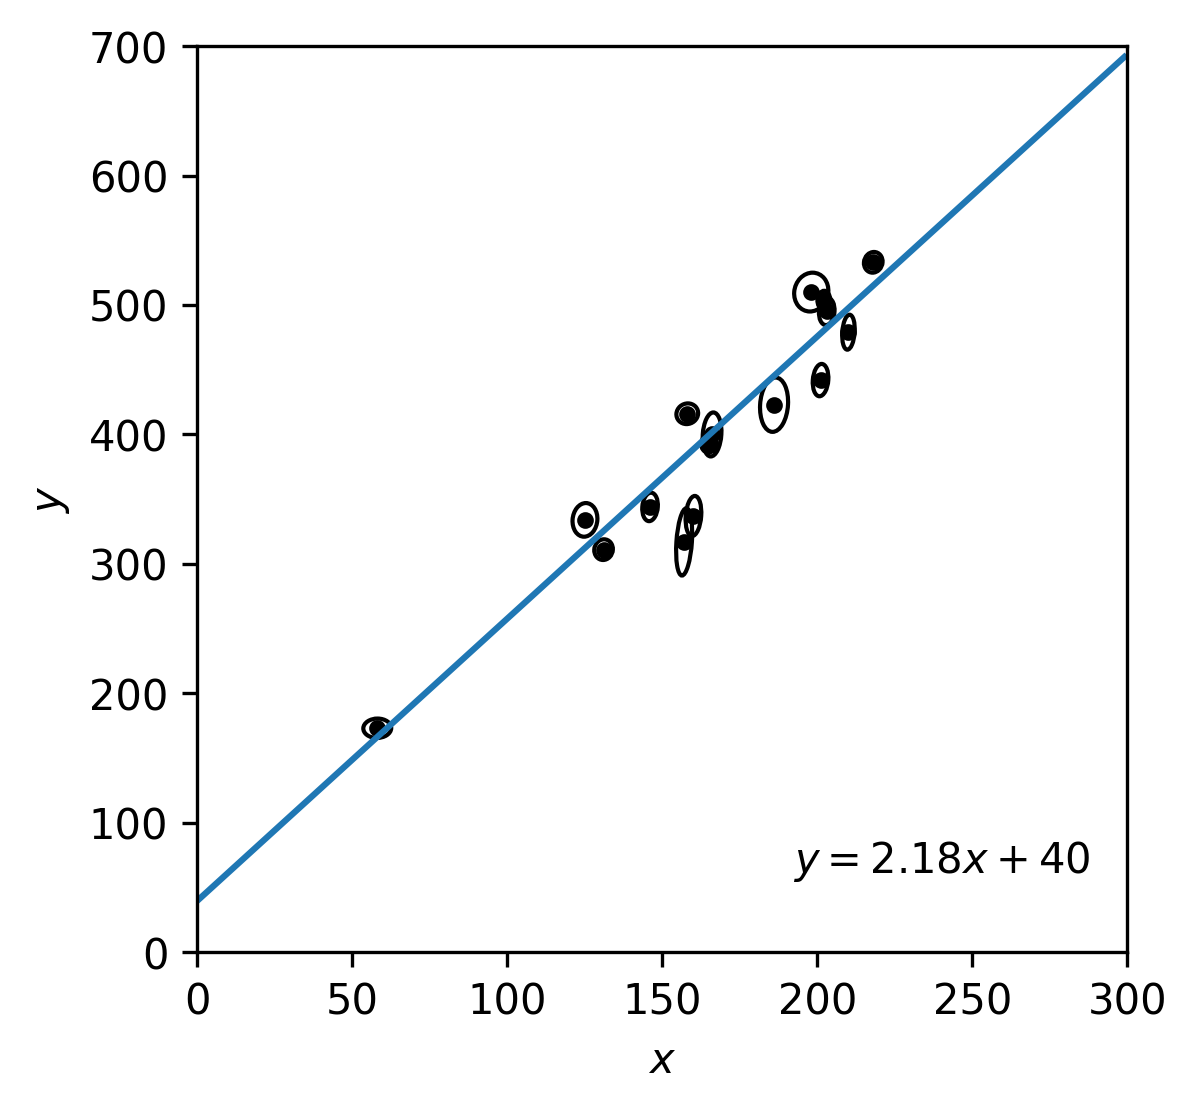

In [120]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=300)
ax.plot(np.arange(0, 300), b_opt + np.arange(0, 300)*m_opt)

ax.scatter(x, y, marker='.', color='black')
for xi, yi, sig_xi, sig_yi, rho_xyi, cov in zip(x, y, sig_x, sig_y, rho_xy, S):
    # compute principal eigenvector in order to get ellipse orientation
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    
    eigv_x, eigv_y = eigenvectors[:, 0]
    
    ell = Ellipse((xi, yi), width=sig_xi, height=sig_yi, 
                  angle=np.arctan2(eigv_x, eigv_y),
                  facecolor='none', edgecolor='black')
    ax.add_artist(ell)

ax.text(0.8, 0.1, r'$y = {:.2f} x + {:.0f}$'.format(m_opt, b_opt), 
        ha='center', va='center', fontsize=10, transform=ax.transAxes)
ax.set_xlim(0, 300)
ax.set_ylim(0, 700)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')